# Project for Pacmann Probability Course

## Import Libraries

In [1]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
from math import factorial
from functuser import print_format
from numerize.numerize import numerize

## Import Data

In [2]:
insurance_data = pd.read_csv('./data/insurance.csv')
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Descriptive Statistics Analysis

### Customer Segment by Age

In [3]:
# Mean
age_mean = insurance_data['age'].mean()
print_format(age_mean, 2)

39.21


### Smoker Age by Sex

In [4]:
smoker = insurance_data.loc[insurance_data['smoker'] == 'yes']

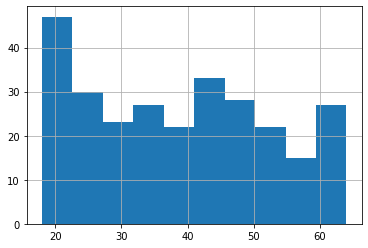

In [5]:
smoker['age'].hist();

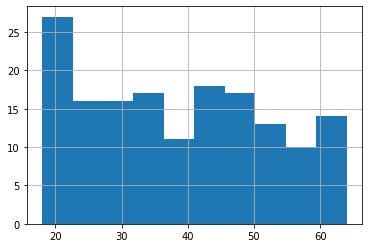

In [6]:
(smoker[smoker['sex'] == 'male'])['age'].hist();

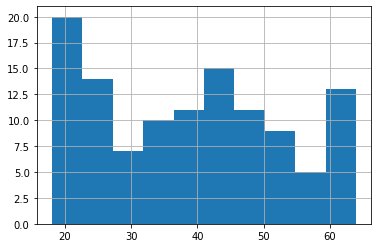

In [7]:
(smoker[smoker['sex'] == 'female'])['age'].hist();

#### Male

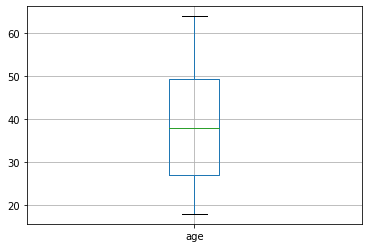

In [8]:
male_smoker_age = (insurance_data.loc[(insurance_data['smoker'] == 'yes')&(insurance_data['sex'] == 'male')])
male_smoker_age.boxplot(column='age');

#### Female

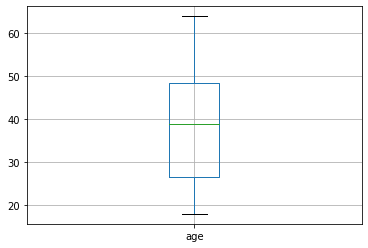

In [9]:
female_smoker_age = (insurance_data.loc[(insurance_data['smoker'] == 'yes')&(insurance_data['sex'] == 'female')])
female_smoker_age.boxplot(column='age');

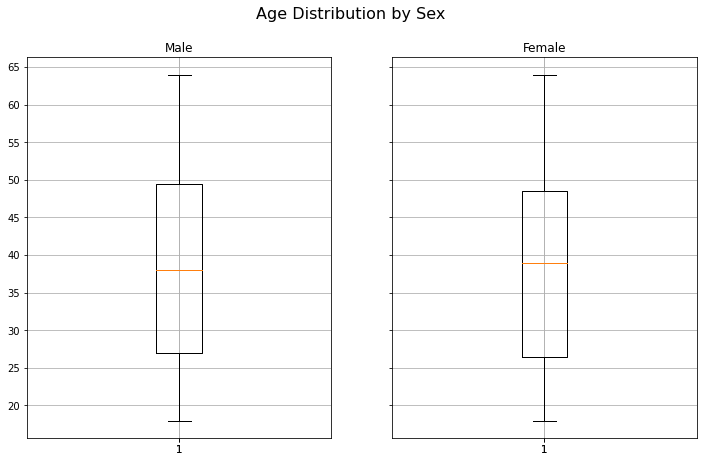

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7), sharey=True,sharex=True)
male_smoker = smoker[smoker['sex'] == 'male']  
female_smoker = smoker[smoker['sex'] == 'female']  

ax1.boxplot(male_smoker['age'])
ax2.boxplot(female_smoker['age'])

ax1.grid(visible=True)
ax2.grid(visible=True)

ax1.set(title="Male")
ax2.set(title="Female")
plt.suptitle("Age Distribution by Sex", fontsize=16)
ax1.title.set_size(12)
ax2.title.set_size(12)

tick_spacing = 5

ax1.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax2.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.show();

In [11]:
smoker[smoker['sex'] == 'male']['age']

14      27
19      30
29      31
30      22
34      28
        ..
1301    62
1303    43
1304    42
1307    32
1321    62
Name: age, Length: 159, dtype: int64

### BMI

#### Smoker BMI Mean 

In [12]:
smokerBMI_mean = (
    insurance_data
    .groupby(['smoker'])
    .mean()
    ['bmi'] #
    )[1] # 1 = yes, 0 = not
print_format(smokerBMI_mean, 3)

30.708


#### Non-smoker BMI Mean

In [13]:
no_smokerBMI_mean = (
    insurance_data
    .groupby(['smoker'])
    .mean()
    ['bmi'] #
    )[0] # 1 = yes, 0 = not
print_format(no_smokerBMI_mean, 3)

30.652


### Variance of Charges

### Smoker

In [14]:
smoker_charges_var = (
    insurance_data
    .loc[insurance_data['smoker'] == 'yes']
    ['charges']
    .var()
    )
print_format(smoker_charges_var, 3) 

133207311.206


In [15]:
print(numerize(smoker_charges_var))

133.21M


#### Non-smoker Variance

In [16]:
# non smoker
non_smoker_charges_var = (
    insurance_data
    .loc[insurance_data['smoker'] == 'no']
    ['charges']
    .var()
)
print_format(non_smoker_charges_var, 3)

35925420.496


In [17]:
print(numerize(non_smoker_charges_var))

35.93M


### Charges by Sex and Age 

In [23]:
# male and female smoker are already present
male_no_smoker = insurance_data.loc[(insurance_data['smoker'] == 'no')&(insurance_data['sex'] == 'male')]
female_no_smoker = insurance_data.loc[(insurance_data['smoker'] == 'no')&(insurance_data['sex'] == 'female')]

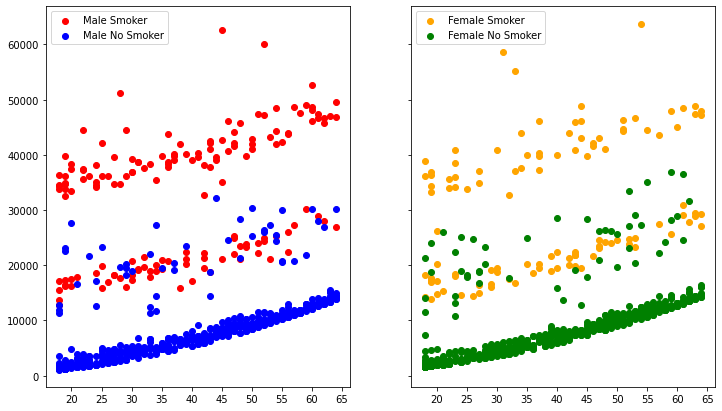

In [28]:
# plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7), sharey=True,sharex=True)

# cat: sex, dimension: age, charges
ax1.scatter(male_smoker['age'], male_smoker['charges'], c='red', label='Male Smoker')
ax2.scatter(female_smoker['age'], female_smoker['charges'], c='orange', label='Female Smoker')
ax1.scatter(male_no_smoker['age'], male_no_smoker['charges'], c='blue', label='Male No Smoker')
ax2.scatter(female_no_smoker['age'], female_no_smoker['charges'], c='green', label='Female No Smoker')

tick_spacing = 5

ax1.legend()
ax2.legend()

ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.show();

### Charges by BMI and Sex for Age > 5

In [30]:
male_smoker_bmi25 = male_smoker.loc[male_smoker['bmi'] > 25]
male_no_smoker_bmi25 = male_no_smoker.loc[male_no_smoker['bmi'] > 25]
female_no_smoker_bmi25 = female_no_smoker.loc[female_no_smoker['bmi'] > 25]
female_smoker_bmi25 = female_no_smoker.loc[female_no_smoker['bmi'] > 25]

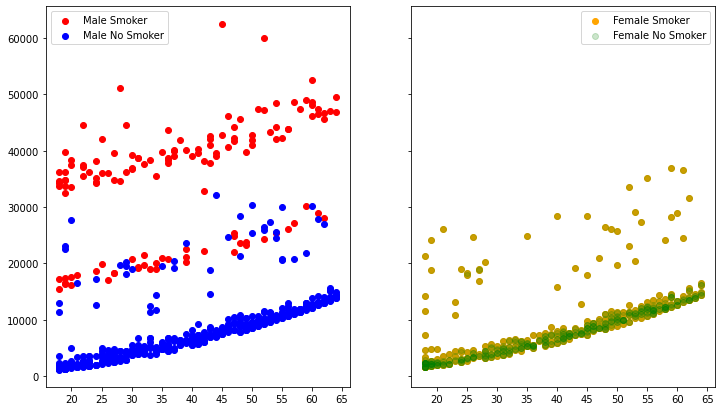

In [39]:
# plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7), sharey=True,sharex=True)

# cat: sex, dimension: age, charges
ax1.scatter(male_smoker_bmi25['age'], male_smoker_bmi25['charges'], c='red', label='Male Smoker')
ax2.scatter(female_smoker_bmi25['age'], female_smoker_bmi25['charges'], c='orange', label='Female Smoker')
ax1.scatter(male_no_smoker_bmi25['age'], male_no_smoker_bmi25['charges'], c='blue', label='Male No Smoker')
ax2.scatter(female_no_smoker_bmi25['age'], female_no_smoker_bmi25['charges'], c='green', label='Female No Smoker', alpha=0.2)

tick_spacing = 5

ax1.legend()
ax2.legend()

ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.show();

### Comparing BMI by Sex

In [48]:
male1 = insurance_data.loc[insurance_data['sex'] == 'male']
female1 = insurance_data.loc[insurance_data['sex'] == 'female']

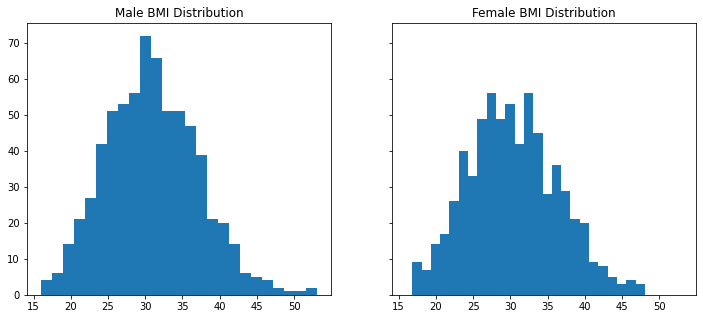

In [68]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)
ax1.hist(male1['bmi'], bins=25)
ax2.hist(female1['bmi'], bins=25)

ax1.set(title='Male BMI Distribution')
ax2.set(title='Female BMI Distribution')

plt.show();

### Comparing BMI by Smoker Status

In [70]:
no_smoker = insurance_data.loc[insurance_data['smoker'] == 'no']

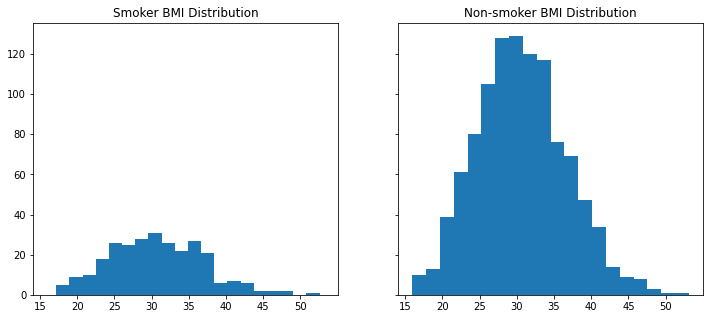

In [72]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)
ax1.hist(smoker['bmi'], bins=20)
ax2.hist(no_smoker['bmi'], bins=20)

ax1.set(title='Smoker BMI Distribution')
ax2.set(title='Non-smoker BMI Distribution')

plt.show();

## Categorical Variable Analysis (PMF)